In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [3]:
batches_meta = unpickle("../cifar-10-batches-py/batches.meta")
label_names = batches_meta['label_names']
print(label_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    batch = unpickle(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id))
        
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
        
    return features, labels

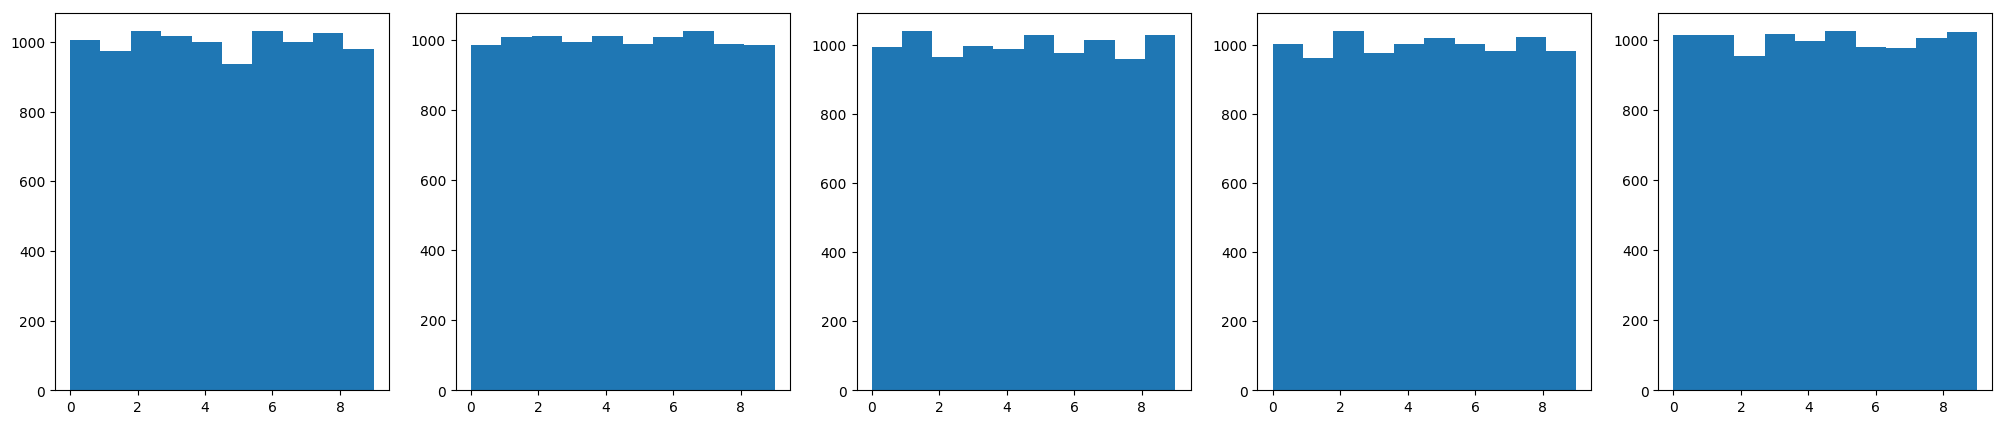

In [5]:
n_batches = 5
cifar10_dataset_folder_path = '../cifar-10-batches-py'

fig = plt.figure(figsize=(25, 5), dpi=100)
for batch_i in range(1, n_batches + 1):
    features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_i)
    plt.subplot(1, n_batches, batch_i)
    plt.hist(np.array(labels))
plt.show()

There is a variation in the dataset.

In [6]:
def show_images_random(data, labels, amount=10):
    for i in range(amount):
        targets = np.where(labels == i)[0]
        np.random.shuffle(targets)
        pos = 1
        for idx in targets[:10]:
            plt.subplot(1, 10, pos)
            img = data[idx]
            plt.imshow(img)
            plt.axis('off')
            label = label_names[i]
            pos += 1
        print(label_names[i])
        plt.show()

airplane


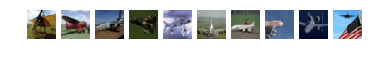

automobile


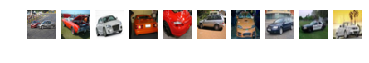

bird


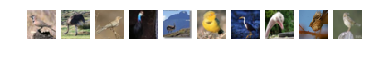

cat


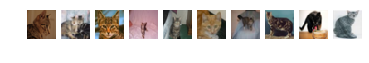

deer


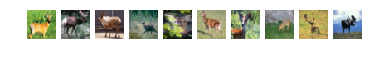

dog


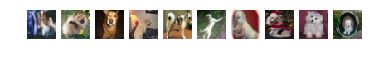

frog


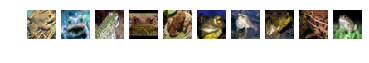

horse


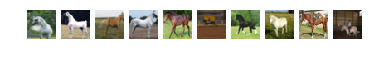

ship


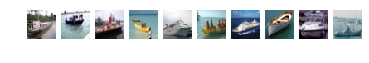

truck


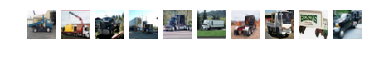

In [7]:
show_images_random(features, labels = np.array(labels))

In [8]:
def getbatch(features, labels, batch_size=16):
    for start in range(0, len(features), batch_size):
        end = min(start + batch_size, len(features))
        yield features[start:end], labels[start:end]

In [9]:
getbatch(features, labels)

<generator object getbatch at 0x7f30ae956780>